# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
AUC = pd.read_csv('AUC_mean_noface.csv', index_col=[0])
AUC_f03 = pd.read_csv('AUC_mean_face_03.csv', index_col=[0])
AUC_f05 = pd.read_csv('AUC_mean_face_05.csv', index_col=[0])
AUC_f07 = pd.read_csv('AUC_mean_face_07.csv', index_col=[0])

### Calculate means

In [4]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [5]:
# AUC = calc_means(AUC)
# AUC_f03 = calc_means(AUC_f03)
# AUC_f05 = calc_means(AUC_f05)
# AUC_f07 = calc_means(AUC_f07)

In [6]:
AUC0 = AUC.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
AUC0

,all,person,no person,animal,sports,electronic
aim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cas,0.684584,0.686342,0.629864,0.679290,0.732609,0.687339
covsal,0.745482,0.747135,0.694021,0.748934,0.743467,0.747759
gbvs,0.752248,0.753870,0.701783,0.753797,0.761036,0.756911
icf,0.728172,0.730213,0.664647,0.711944,0.753560,0.729476
ik,0.665589,0.667318,0.611768,0.656488,0.695180,0.674561
sun,0.618703,0.619697,0.587780,0.584216,0.614344,0.628765


In [7]:
AUC_f07

,all,person,no person,animal,sports,electronic
aim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cas,0.725242,0.728070,0.637219,0.707019,0.755865,0.723563
covsal,0.779689,0.782015,0.707274,0.782075,0.778252,0.781923
gbvs,0.774758,0.777009,0.704682,0.771900,0.780714,0.777646
icf,0.746085,0.748523,0.670202,0.728060,0.771252,0.747440
ik,0.712523,0.715324,0.625357,0.695944,0.730780,0.715614
sun,0.680179,0.682702,0.601659,0.638360,0.670904,0.682237


In [8]:
AUC_diff_f03 = ((AUC_f03 - AUC0) / AUC0)*100
AUC_diff_f05 = ((AUC_f05 - AUC0) / AUC0)*100
AUC_diff_f07 = ((AUC_f07 - AUC0) / AUC0)*100

In [9]:
AUC_diff_f03

,all,person,no person,animal,sports,electronic
aim,NaN,NaN,NaN,NaN,NaN,NaN
cas,3.701488,3.787664,0.778992,2.463141,1.977615,3.304966
covsal,2.634034,2.695414,0.577545,2.550293,2.395477,2.593908
gbvs,2.179350,2.228643,0.531383,1.702474,1.755301,1.971461
icf,1.445577,1.465748,0.755854,1.064159,1.210103,1.420861
ik,5.129948,5.233100,1.628104,4.071450,3.437734,4.348885
sun,7.131930,7.294176,1.808245,6.481262,6.199410,6.142055


In [10]:
AUC_diff_f03 = calc_means(AUC_diff_f03)
AUC_diff_f05 = calc_means(AUC_diff_f05)
AUC_diff_f07 = calc_means(AUC_diff_f07)

In [11]:
AUC_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cas,5.939068,6.079760,1.167790,4.082041,3.174469,5.270231,4.285560
covsal,4.588568,4.668524,1.909682,4.424990,4.678783,4.568857,4.139901
gbvs,2.992298,3.069447,0.413012,2.401548,2.585756,2.739370,2.366905
icf,2.460019,2.507521,0.835797,2.263716,2.347774,2.462617,2.146241
ik,7.051614,7.193897,2.221355,6.010253,5.120885,6.085951,5.613993
sun,9.936290,10.167146,2.361345,9.267944,9.206602,8.504206,8.240589
mean model,5.494643,5.614382,1.484830,4.741749,4.519045,4.938539,4.465531


In [12]:
mean_context_diff_f03 = AUC_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = AUC_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = AUC_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,NaN,NaN,NaN
cas,2.668978,3.717303,4.285560
covsal,2.241112,3.072575,4.139901
gbvs,1.728102,2.189693,2.366905
icf,1.227050,1.616514,2.146241
ik,3.974870,4.894447,5.613993
sun,5.842846,7.390046,8.240589
mean model,2.947160,3.813430,4.465531


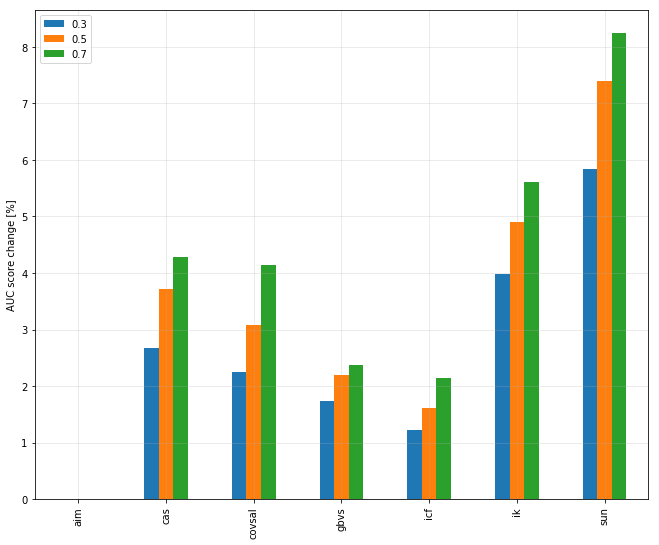

In [13]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel('AUC score change [%]');

plt.savefig('../plots/AUC_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [14]:
mean_model_diff_f03 = AUC_diff_f03.loc['mean model']
mean_model_diff_f05 = AUC_diff_f05.loc['mean model']
mean_model_diff_f07 = AUC_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,3.703721,4.787170,5.494643
person,3.784124,4.894768,5.614382
no person,1.013354,1.184922,1.484830
animal,3.055463,3.981870,4.741749
sports,2.829273,3.778985,4.519045
electronic,3.297023,4.252862,4.938539
mean context,2.947160,3.813430,4.465531


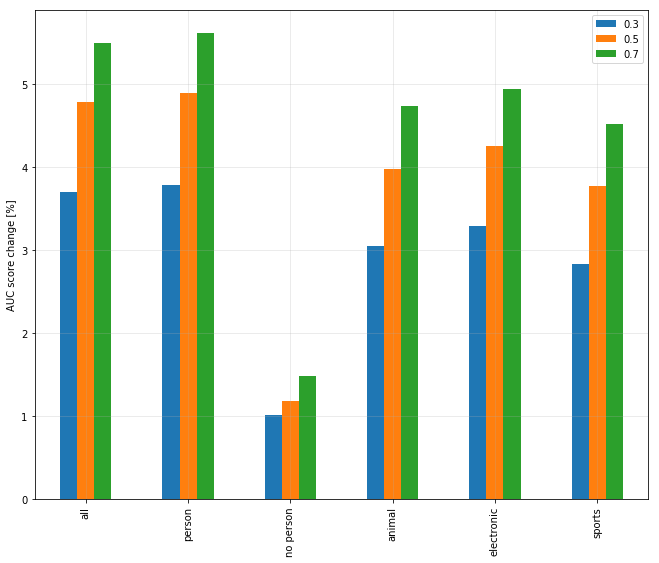

In [15]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel('AUC score change [%]');

plt.savefig('../plots/AUC_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)